### scikit-learnのmap

![scikit-learn map](https://scikit-learn.org/stable/_static/ml_map.png)

In [1]:
import numpy as np
from load_data import *

- データ： (x_train, t_train), (x_test, t_test)

In [2]:
train_suffle_index = np.random.permutation(len(x_train))
test_suffle_index = np.random.permutation(len(x_test))
(x_train, t_train), (x_test, t_test) = (x_train[train_suffle_index], t_train[train_suffle_index]), (x_test[test_suffle_index], t_test[test_suffle_index])

In [3]:
if __name__ == '__main__':
    print(np.shape(x_train), np.shape(t_train), np.shape(x_test), np.shape(t_test))

(920, 196608) (920,) (475, 196608) (475,)


### SGDClassifierで検証

In [4]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, t_train)

C:\Users\oshimatani ryo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
sgd_pred = sgd_clf.predict(x_test);

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(metrics.confusion_matrix(t_test, sgd_pred))

[[387  52]
 [  7  29]]


In [7]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

sgd_expected = t_train
sgd_predicted = sgd_clf.predict(x_train)
sgd_auc = metrics.roc_auc_score(sgd_expected, sgd_predicted)

confusion_matrix(t_test, sgd_pred)
print("Accuracy: ", metrics.accuracy_score(sgd_expected, sgd_predicted))
print("Precision(micro): ", metrics.precision_score(sgd_expected, sgd_predicted, average='micro'))
print("Recall(micro): ", metrics.recall_score(sgd_expected, sgd_predicted, average='micro'))
print("F-score(micro): ", metrics.f1_score(sgd_expected, sgd_predicted, average='micro'))
print("AUC: ", metrics.roc_auc_score(sgd_expected, sgd_predicted))

Accuracy:  0.9380434782608695
Precision(micro):  0.9380434782608695
Recall(micro):  0.9380434782608695
F-score(micro):  0.9380434782608695
AUC:  0.9114112138259259


#### metrics
-----
- Accuracy(正解率) : 全体の内の正解数
- Precision(適合率) : ラベルをX(0 or 1)と予想したもののうち、正解だったものの割合
- Recall(再現率) : 正解ラベルがX(0 or 1)のもののうち、実際にXと予想されたものの割合
- F1-score : PrecisionとRecallの調和平均 
    * $F_1 = \frac{2}{\frac{1}{precision}+\frac{1}{recall}} = 2 \times \frac{precision\times recall}{precision+recall} = \frac{TP}{TP+\frac{FN+FP}{2}}$


- precisionとrecallはトレードオフの関係

In [8]:
print('testdata_size : ', len(x_test))
print('acc_size : ', np.sum(t_test))
sgd_cr = metrics.classification_report(sgd_expected, sgd_predicted)
print(sgd_cr)

testdata_size :  475
acc_size :  36.0
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       807
         1.0       0.70      0.88      0.78       113

   micro avg       0.94      0.94      0.94       920
   macro avg       0.84      0.91      0.87       920
weighted avg       0.95      0.94      0.94       920



-----
- fpr(false positive ratio:偽陽性率) : 正解ラベル'0'であるものを間違って'1'と予測した割合
- tpr(true positive rate:真陽性率) : 正解ラベル'1'であるものを正しく'1'と予測した割合
---
- ROC曲線(Receiver Operating Characteristic) : 偽陽性率に対する真陽性率

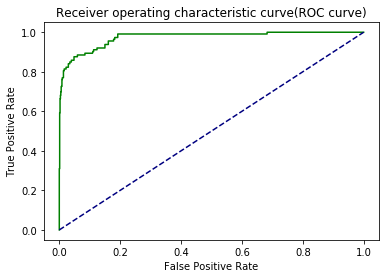

In [9]:
from sklearn.metrics import roc_curve

sgd_score = sgd_clf.decision_function(x_train)

fpr, tpr, threshold = metrics.roc_curve(t_train, sgd_score)
plt.figure()
plt.plot(fpr, tpr, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve(ROC curve)')
plt.show()

### Random Forestで再検証

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, t_train)

C:\Users\oshimatani ryo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
rf_pred = rf_clf.predict(x_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(metrics.confusion_matrix(t_test, rf_pred))

[[435   4]
 [ 13  23]]


In [13]:
rf_expected = t_test
rf_predicted = rf_pred
rf_auc = metrics.roc_auc_score(rf_expected, rf_predicted)

confusion_matrix(t_test, rf_pred)
print("Accuracy: ", metrics.accuracy_score(rf_expected, rf_predicted))
print("Precision(micro): ", metrics.precision_score(rf_expected, rf_predicted, average='micro'))
print("Recall(micro): ", metrics.recall_score(rf_expected, rf_predicted, average='micro'))
print("F-score(micro): ", metrics.f1_score(rf_expected, rf_predicted, average='micro'))
print("AUC: ", metrics.roc_auc_score(rf_expected, rf_predicted))

Accuracy:  0.9642105263157895
Precision(micro):  0.9642105263157895
Recall(micro):  0.9642105263157895
F-score(micro):  0.9642105263157895
AUC:  0.814888635788408


In [14]:
print('testdata_size : ', len(x_test))
print('acc_size : ', np.sum(t_test))

rf_cr = metrics.classification_report(rf_expected, rf_predicted)
print(rf_cr)

testdata_size :  475
acc_size :  36.0
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       439
         1.0       0.85      0.64      0.73        36

   micro avg       0.96      0.96      0.96       475
   macro avg       0.91      0.81      0.86       475
weighted avg       0.96      0.96      0.96       475



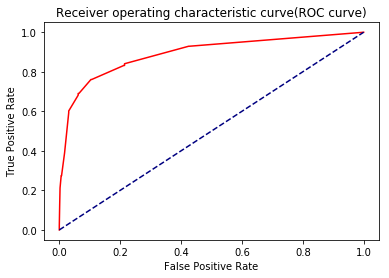

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

rf_score = cross_val_predict(rf_clf, x_train, t_train, cv=3, 
                            method="predict_proba")

fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(t_train, rf_score[:, 1])
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve(ROC curve)')
plt.show()

### SGDClassiffierとRandomForestの比較

#### Confusion Matrix

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(metrics.confusion_matrix(t_test, sgd_pred))
print(metrics.confusion_matrix(t_test, rf_pred))

[[387  52]
 [  7  29]]
[[435   4]
 [ 13  23]]


#### Classification Report

In [17]:
print('SGDClassifier:\n', sgd_cr)
print('\n')
print('RandomForest:\n', rf_cr)

SGDClassifier:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       807
         1.0       0.70      0.88      0.78       113

   micro avg       0.94      0.94      0.94       920
   macro avg       0.84      0.91      0.87       920
weighted avg       0.95      0.94      0.94       920



RandomForest:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       439
         1.0       0.85      0.64      0.73        36

   micro avg       0.96      0.96      0.96       475
   macro avg       0.91      0.81      0.86       475
weighted avg       0.96      0.96      0.96       475



#### ROC曲線とAUC

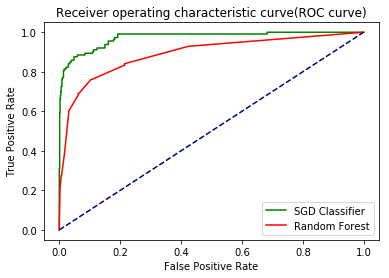

In [18]:
plt.plot(fpr, tpr, color='green', label='SGD Classifier')
plt.plot(fpr_rf, tpr_rf, color='red', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver operating characteristic curve(ROC curve)')
plt.show()

In [19]:
print('AUC(SGD Classification) : ', sgd_auc)
print('     AUC(Random Forest) : ', rf_auc)

AUC(SGD Classification) :  0.9114112138259259
     AUC(Random Forest) :  0.814888635788408


### TensorFlowで検証

In [20]:
import tensorflow as tf
from tensorflow import keras

# Three Layer ANN( ReLU - ReLU - Sigmoid )
model = keras.Sequential([
    # keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.sigmoid)
])


In [21]:
# Optimizer : Adam
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(x_train, t_train, epochs=5)

Epoch 1/5
920/920 [==============================] - 11s 12ms/step - loss: 1.9581 - acc: 0.8495
Epoch 2/5
920/920 [==============================] - 8s 9ms/step - loss: 1.9797 - acc: 0.8772
Epoch 3/5
920/920 [==============================] - 9s 10ms/step - loss: 1.9797 - acc: 0.8772
Epoch 4/5
920/920 [==============================] - 9s 9ms/step - loss: 1.9797 - acc: 0.8772
Epoch 5/5
920/920 [==============================] - 8s 9ms/step - loss: 1.9797 - acc: 0.8772


In [23]:
test_loss, test_acc = model.evaluate(x_test, t_test)
print('Test accuracy:', test_acc)

475/475 [==============================] - 2s 4ms/step
Test accuracy: 0.9242105254374052


In [24]:
print(test_loss)

1.2215819975419042


---
(tensorflowでのmetricsの出し方がよく分からない)

In [25]:
tf_pred = model.predict(x_test)
tf_pred = np.sum(tf_pred, axis=1)
print(np.shape(tf_pred))

(475,)


In [26]:
tf_recall, update_op = tf.metrics.recall(t_test, tf_pred)
tf_precision, update_op = tf.metrics.precision(t_test, tf_pred)

In [27]:
print(tf_recall, tf_precision)

Tensor("recall/value:0", shape=(), dtype=float32) Tensor("precision/value:0", shape=(), dtype=float32)


---